# First some dirty trickery

In [57]:
!pip install matplotlib
!pip install scipy

  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/b8/46/1d255bb55e63de02f7b2f3a2f71b59b840db21d61ff7cd41edbfc2da448a/scipy-1.11.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 4.0 MB/s eta 0:00:0000:0100:01


In [1]:
import sys

sys.path.append("../src")
sys.path

['/home/jovyan/notebooks',
 '/opt/conda/lib/python311.zip',
 '/opt/conda/lib/python3.11',
 '/opt/conda/lib/python3.11/lib-dynload',
 '',
 '/opt/conda/lib/python3.11/site-packages',
 '../src']

In [2]:
from pathlib import Path
import json
import pickle 

data_storage = Path("notebooks/data")

def save_json(data, file_name):
    file_name = Path(file_name).stem
    with open(data_storage / f"{file_name}.json", "w") as f:
        json.dump(data, f, indent=4)

def save_pickle(data, file_name):
    file_name = Path(file_name).stem
    with open(data_storage / f"{file_name}.pickle", "wb") as f:
        pickle.dump(data, f)


# Open storage

In [3]:
from opa.core import *
from opa.http_methods import get_json_data
from opa.providers import opa_provider
from opa.storage import opa_storage

2023-08-17 15:10:13.535 | INFO     | opa.storage.mongodb:_create_collections_if_not_exist:250 - Collection stock_values already exists, skipping creation
2023-08-17 15:10:13.539 | INFO     | opa.storage.mongodb:_create_collections_if_not_exist:250 - Collection company_info already exists, skipping creation


## Data

In [77]:
ALL_TICKERS = ["AAPL", "MSFT", "AMZN", "GOOG", "META"]

In [78]:
values = {
    ticker: opa_storage.get_values(ticker, StockValueKind.SIMPLE, 0)
    for ticker in ALL_TICKERS
}

2023-08-17 16:11:59.514 | INFO     | opa.storage.mongodb:get_values:178 - 10760 simple stock values retrieved from storage
2023-08-17 16:11:59.916 | INFO     | opa.storage.mongodb:get_values:178 - 9434 simple stock values retrieved from storage
2023-08-17 16:12:00.320 | INFO     | opa.storage.mongodb:get_values:178 - 6608 simple stock values retrieved from storage
2023-08-17 16:12:00.540 | INFO     | opa.storage.mongodb:get_values:178 - 4782 simple stock values retrieved from storage
2023-08-17 16:12:01.148 | INFO     | opa.storage.mongodb:get_values:178 - 2830 simple stock values retrieved from storage


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def into_df(ticker):
    df = pd.DataFrame([v.model_dump() for v in values[ticker]])\
            .dropna(axis="columns")\
            .drop(["interval"], axis="columns")\
            .set_index("date")
    df["variation"]=df["close"].pct_change(-1)
    return df

df = into_df("AAPL")
df.head(5)

,ticker,close,variation
date,,,
2023-08-16 16:00:00,AAPL,176.57,-0.004959
2023-08-15 16:00:00,AAPL,177.45,-0.011200
2023-08-14 16:00:00,AAPL,179.46,0.009393
2023-08-11 16:00:00,AAPL,177.79,-0.001011
2023-08-10 16:00:00,AAPL,177.97,-0.001235


In [96]:
df_meta = pd.DataFrame()
for t in ALL_TICKERS:
    tmp = into_df(t)
    df_meta[f"close_{t}"] = tmp["close"]
    df_meta[f"var_{t}"] = tmp["variation"]
df_meta

,close_AAPL,var_AAPL,close_MSFT,var_MSFT,close_AMZN,var_AMZN,close_GOOG,var_GOOG,close_META,var_META
date,,,,,,,,,,
2023-08-16 16:00:00,176.57000,-0.004959,320.40,-0.004536,135.07,-0.018886,129.11,-0.008905,294.29,-0.025368
2023-08-15 16:00:00,177.45000,-0.011200,321.86,-0.006728,137.67,-0.020630,130.27,-0.011833,301.95,-0.013848
2023-08-14 16:00:00,179.46000,0.009393,324.04,0.009439,140.57,0.015606,131.83,0.012753,306.19,0.015084
2023-08-11 16:00:00,177.79000,-0.001011,321.01,-0.005946,138.41,-0.001083,130.17,-0.000307,301.64,-0.013410
2023-08-10 16:00:00,177.97000,-0.001235,322.93,0.002172,138.56,0.005151,130.21,0.000461,305.74,0.001737
...,...,...,...,...,...,...,...,...,...,...
1980-12-17 16:00:00,0.11551,0.024752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-16 16:00:00,0.11272,-0.073407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-15 16:00:00,0.12165,-0.052201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


array([[<Axes: title={'center': 'var_AAPL'}>,
        <Axes: title={'center': 'var_MSFT'}>],
       [<Axes: title={'center': 'var_AMZN'}>,
        <Axes: title={'center': 'var_GOOG'}>],
       [<Axes: title={'center': 'var_META'}>, <Axes: >]], dtype=object)

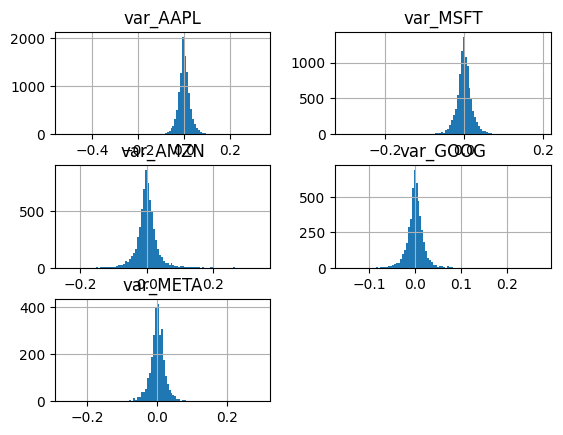

In [97]:
df_meta[[c for c in df_meta.columns if c.startswith("var")]].hist(bins=100)

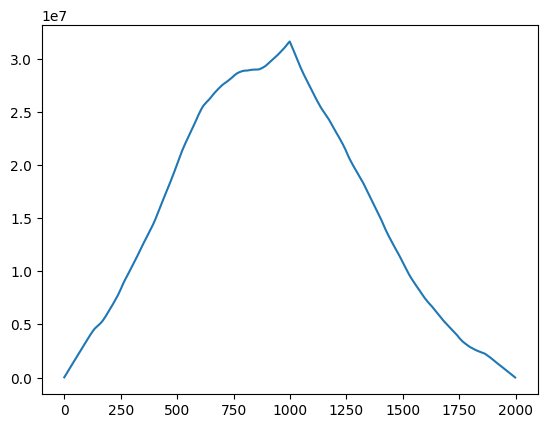

In [89]:
from scipy.signal import correlate
dfs = {}
for t in ALL_TICKERS:
    dfs[t] = into_df(t)

freqs = correlate(dfs["AAPL"][["close"]].dropna().values[:1000], dfs["META"][["close"]].dropna().values[:1000], mode="full")
plt.plot(freqs)

## Data retrieval

An example of the raw output of the API

In [6]:
aapl_stock_raw = opa_provider.get_raw_stock_values("AAPL", StockValueKind.SIMPLE, StockValueSerieGranularity.COARSE)
save_json(aapl_stock_raw, "apple_historical_data_raw")
aapl_stock_raw

FileNotFoundError: [Errno 2] No such file or directory: 'notebooks/data/apple_historical_data_raw.json'

In [ ]:
aapl_stock = opa_provider.get_stock_values("AAPL", StockValueType.HISTORICAL)
save_pickle(aapl_stock, "apple_historical_data")
aapl_stock